### Import Package

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import random

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

### ==============================

In [2]:
class Fitness:
    def __init__(self, X, y, classifier):
        self.data = X
        self.label = y
        self.classifier = classifier
        self.dim = len(X.columns)
        
        self.subset = []
        self. fit = 0
        
    def calculate(self, subset):
        try :
            # copy dataset
            df = self.data.copy()

            # get feature list
            feature = df.columns
            
            # create subset from dataset
            for i in range(len(feature)):
                if subset[i] == 0:
                    df.drop(columns=feature[i], inplace=True)        
            self.subset = df
            
        except :
            print('subset length and dataset features not same')
            
        else : 
            X = df
            y = self.label
            
            acc = cross_val_score(self.classifier, X, y)
            
            a = 0.8
            b = 0.2
            
            # dari penelitian BAI JI
            fit = (a*(1 - acc.mean())) + (b*(len(X.columns)/len(self.data.columns)))
            # print(f"Fit = ({a} * {1 - acc.mean()}) + {b} * ({len(X.columns)} / {len(self.data.columns)}) = {fit}")
            self.fit = fit
            
            return fit

In [3]:
class solution:
    def __init__(self):
        self.best = 0
        self.convergence = []
        self.optimizer = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.dim = 0
        self.popnum = 0
        self.detail = ''

In [4]:
def BGWO(objf, dim, SearchAgents_no, Max_iter, seeds = 1, out=True):

    #  Random seed
    np.random.seed(seeds)
    random.seed(seeds)

    # initialize alpha, beta, and delta_pos
    Alpha_pos = np.zeros(dim)
    Alpha_score = float("inf")
    Beta_pos = np.zeros(dim)
    Beta_score = float("inf")
    Delta_pos = np.zeros(dim)
    Delta_score = float("inf")

    # Initialize the positions of search agents and calculate fitness
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(SearchAgents_no):
        for j in range(dim):
            Positions[i, j] = (
                np.random.randint(0, 2)
            )

        fitness = objf.calculate(Positions[i, :])

        # Update Alpha, Beta, and Delta
        if fitness < Alpha_score:
            Delta_score = Beta_score  # Update delte
            Delta_pos = Beta_pos.copy()
            Beta_score = Alpha_score  # Update beta
            Beta_pos = Alpha_pos.copy()
            Alpha_score = fitness
            # Update alpha
            Alpha_pos = Positions[i, :].copy()
            res = fitness.copy()

        if fitness > Alpha_score and fitness < Beta_score:
            Delta_score = Beta_score  # Update delte
            Delta_pos = Beta_pos.copy()
            Beta_score = fitness # Update beta
            Beta_pos = Positions[i, :].copy()

        if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score:
            Delta_score = fitness  # Update delta
            Delta_pos = Positions[i, :].copy()

    # initialize a, A, C
    a = 2

    Convergence_curve = np.zeros(Max_iter)
    s = solution()

    # Loop counter
    if out == True:
        print('BGWO is optimizing')

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0, Max_iter):
        #print("- Iter : "+str(l+1))

        # Update the Position of search agents including omegas
        for i in range(0, SearchAgents_no):
            for j in range(0, dim):

                r1 = random.random()  # r1 is a random number in [0,1]
                r2 = random.random()  # r2 is a random number in [0,1]

                A1 = 2 * a * r1 - a
                # Equation (3.3)
                C1 = 2 * r2
                # Equation (3.4)

                D_alpha = abs(C1 * Alpha_pos[j] - Positions[i, j])
                # Equation (3.5)-part 1
                X1 = Alpha_pos[j] - A1 * D_alpha
                # Equation (3.6)-part 1

                r1 = random.random()
                r2 = random.random()

                A2 = 2 * a * r1 - a
                # Equation (3.3)
                C2 = 2 * r2
                # Equation (3.4)

                D_beta = abs(C2 * Beta_pos[j] - Positions[i, j])
                # Equation (3.5)-part 2
                X2 = Beta_pos[j] - A2 * D_beta
                # Equation (3.6)-part 2

                r1 = random.random()
                r2 = random.random()

                A3 = 2 * a * r1 - a
                # Equation (3.3)
                C3 = 2 * r2
                # Equation (3.4)

                D_delta = abs(C3 * Delta_pos[j] - Positions[i, j])
                # Equation (3.5)-part 3
                X3 = Delta_pos[j] - A3 * D_delta
                # Equation (3.5)-part 3

                ran = random.uniform(0, 1)
                x = (X1 + X2 + X3) / 3
                sig = 1/(1 + np.exp(-10*(x-0.5)))
                if sig >= ran:
                    Positions[i, j] = 1
                else:
                    Positions[i, j] = 0

            # check is zero or not
            xx = 0
            for x in range(0, len(Positions[i, :])):
                if Positions[i, x] == 1:
                    xx = 1

            if xx == 0:
                for j in range(dim):
                    Positions[i, j] = (np.random.randint(0, 2))

        # update a
        a = 2 - l * ((2) / Max_iter)
        # a decreases linearly fron 2 to 0

        # fitness calculate
        for i in range(0, SearchAgents_no):

            fitness = objf.calculate(Positions[i, :])
            #print("Wolf : "+str(i+1)+" Fit : "+str(fitness['fit']))

            # Update Alpha, Beta, and Delta
            if fitness < Alpha_score:
                Delta_score = Beta_score  # Update delte
                Delta_pos = Beta_pos.copy()
                Beta_score = Alpha_score  # Update beta
                Beta_pos = Alpha_pos.copy()
                Alpha_score = fitness
                # Update alpha
                Alpha_pos = Positions[i, :].copy()
                res = fitness.copy()

            if fitness > Alpha_score and fitness < Beta_score:
                Delta_score = Beta_score  # Update delte
                Delta_pos = Beta_pos.copy()
                Beta_score = fitness  # Update beta
                Beta_pos = Positions[i, :].copy()

            if fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score:
                Delta_score = fitness  # Update delta
                Delta_pos = Positions[i, :].copy()

        Convergence_curve[l] = Alpha_score

        if l % 1 == 0 and out == True:
            print(
                ["At iteration " +
                    str(l+1) + " the best fitness is " + str(Alpha_score)]
            )

    timerEnd = time.time()
    s.best = Alpha_pos.copy()
    s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    s.executionTime = timerEnd - timerStart
    s.convergence = Convergence_curve
    s.optimizer = "BGWO"
    s.dim = dim
    s.popnum = SearchAgents_no
    s.detail = Alpha_score

    return s

In [5]:
def BPSOGWO(objf, dim, PopSize, iters, seeds=1):
    # PSO parameters
    wMax = 0.9
    wMin = 0.4
    c1 = 2.1
    c2 = 1.9

    s = solution()
    # Initializations

    # Random seed
    np.random.seed(seeds)
    random.seed(seeds)

    vel = np.zeros((PopSize, dim))

    pBestScore = np.zeros(PopSize)
    pBestScore.fill(float("inf"))

    pBest = np.zeros((PopSize, dim))
    gBest = np.zeros(dim)

    gBestScore = float("inf")

    pos = np.zeros((PopSize, dim))

    # initiakize random and calculate fitness
    for i in range(PopSize):
        for j in range(dim):
            pos[i, j] = np.random.randint(0, 2)

    for i in range(0, PopSize):
        fitness = objf.calculate(pos[i, :])

        if pBestScore[i] > fitness :
            pBestScore[i] = fitness
            pBest[i, :] = pos[i, :].copy()

        if gBestScore > fitness :
            gBestScore = fitness
            gBest = pos[i, :].copy()

    convergence_curve = np.zeros(iters)
    
    ############################################
    print('BPSO-GWO is optimizing')

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

    w = wMax
    for l in range(0, iters):
        
        # update pos + vel
        for i in range(0, PopSize):
            for j in range(0, dim):

                r1 = random.random()
                r2 = random.random()
                vel[i, j] = (
                    w * vel[i, j]
                    + c1 * r1 * (pBest[i, j] - pos[i, j])
                    + c2 * r2 * (gBest[j] - pos[i, j])
                )

                # update position
                rand = random.uniform(0, 1)    # randomizations
                sig = 1/(1 + np.exp(-vel[i, j]))
                if rand < sig:
                    pos[i, j] = 1
                else:
                    pos[i, j] = 0

            # check is zero or not
            xx = 0
            for x in range(0, len(pos[i, :])):
                if pos[i, x] == 1:
                    xx = 1

            if xx == 0:
                for j in range(dim):
                    pos[i, j] = (np.random.randint(0, 2))
                    
            ############################################ GWO ################
            rand2 = random.uniform(0, 1)
            if rand2 < 0.02:  # 2% rate
                #print("GWO Run in Particle no. "+str(i+1))
                x = BGWO(objf, dim, 10, 10, (i+l), out=False)
                print("GWO Run in Particle no. "+str(i+1) +
                      ", Result : "+str(x.detail))
                pos[i, :] = x.best.copy()
            ############################################ GWO ################

        # Update the W of PSO
        w = wMax - (((wMax - wMin) / iters)*l)

        # check Fitness
        for i in range(0, PopSize):
            fitness = objf.calculate(pos[i, :])

            if pBestScore[i] > fitness :
                pBestScore[i] = fitness
                pBest[i, :] = pos[i, :].copy()

            if gBestScore > fitness :
                gBestScore = fitness
                gBest = pos[i, :].copy()

        convergence_curve[l] = gBestScore

        if l % 1 == 0:
            print(
                [
                    "At iteration "
                    + str(l + 1)
                    + " the best fitness is "
                    + str(gBestScore)
                ]
            )

    timerEnd = time.time()
    s.best = gBest
    s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "BPSO"
    s.dim = dim
    s.popnum = PopSize
    s.detail = gBestScore
    
    plt.plot(s.convergence)

    return s

In [6]:
def subset_feature(dataset, subset):
    # copy dataset
    df = dataset.copy()

    # get feature list
    feature = df.columns

    # create subset from dataset
    for i in range(len(subset)):
        if subset[i] == 0:
            df.drop(columns=feature[i], inplace=True)

    return df

### ==========================================

## Import dataset

In [7]:
df = pd.read_csv('data/bcw.csv', index_col='id')

X = df.drop(columns="diagnosis")
y = df['diagnosis']


# train test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
# classifier untuk fitness function
knn = KNeighborsClassifier()

#Inisialisasi fitness function
fitness = Fitness(X_train, y_train, knn)

BPSO is optimizing
['At iteration 1 the best fitness is 0.1320879120879121']
['At iteration 2 the best fitness is 0.11062271062271065']
['At iteration 3 the best fitness is 0.11062271062271065']
GWO Run in Particle no. 5, Result : 0.07377289377289381
['At iteration 4 the best fitness is 0.07377289377289381']
['At iteration 5 the best fitness is 0.07377289377289381']
['At iteration 6 the best fitness is 0.07377289377289381']
['At iteration 7 the best fitness is 0.07377289377289381']
['At iteration 8 the best fitness is 0.07377289377289381']
GWO Run in Particle no. 4, Result : 0.06710622710622714
['At iteration 9 the best fitness is 0.06710622710622714']
['At iteration 10 the best fitness is 0.06710622710622714']
GWO Run in Particle no. 6, Result : 0.06395604395604398
['At iteration 11 the best fitness is 0.06395604395604398']
['At iteration 12 the best fitness is 0.06395604395604398']
GWO Run in Particle no. 9, Result : 0.06747252747252758
['At iteration 13 the best fitness is 0.0639560

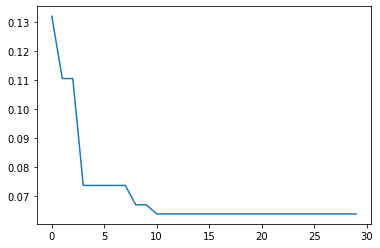

In [9]:
# Seleksi fitur BPSOGWO
hasil = BPSOGWO(fitness, len(X_train.columns), 10, 30)

In [10]:
# hasil seleksi fitur
X_train_new = subset_feature(X_train, hasil.best)
X_test_new = subset_feature(X_test, hasil.best)

X_train_new

,radius_worst,texture_worst,concavity_worst
id,,,
845636,19.19,33.88,0.14590
87139402,13.50,15.64,0.12420
905190,14.40,27.01,0.18380
907914,16.35,27.57,0.90190
852781,21.31,27.26,0.34460
...,...,...,...
854941,13.30,22.81,0.04833
905686,13.05,27.21,0.11640
9112594,14.34,31.88,0.04462


### Perbandingan Akurasi (Algoritma KNN)

In [11]:
# tanpa seleksi fitur (30 Fitur)

# inisialisasi model
model = KNeighborsClassifier(n_neighbors=5)

# train model
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, pred)
acc

0.9122807017543859

In [13]:
# tanpa seleksi fitur (3 Fitur)

# inisialisasi model
model = KNeighborsClassifier(n_neighbors=5)

# train model
model.fit(X_train_new, y_train)

# predict
pred = model.predict(X_test_new)

# accuracy score
acc = accuracy_score(y_test, pred)
acc

0.9035087719298246